In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def eigen_function(t,i):
    if not type(i) == np.ndarray:
        return np.sin(np.pi*i*t)
    else:
        return np.sin(np.pi*np.outer(i,t))
        # return np.sin(np.pi * i[:, np.newaxis] * t)

def eigen_value(i):
    return 1/(np.pi*i)**2

def KL_dt(t,d, distr = 'normal'):
    """Looks pretty good now."""

    dims = np.arange(1,d+1,1, dtype=int) # dimensions
    eig_vals = eigen_value(dims)
    eig_funs = eigen_function(t,dims) # comes as 2D array

    # draw random vector
    if distr == 'normal':
        Yhat = np.random.normal(0,1,size =d )
    elif distr == 'uniform':
        Yhat = np.random.uniform(-1,1,size = d)
    else:
        raise AttributeError("Only 'normal' or 'uniform' distribution are allowed")
    
    Zi = np.multiply(np.sqrt(eig_vals), Yhat) # random part
    Zi = np.expand_dims(Zi,1) # expand array for broadcasting
    Yt = np.sum(Zi * eig_funs, axis=0) # mulitply random with temporal part and sum over dimensions
    
    # zero mean / normalize, not sure if necessary
    Yt -= np.mean(Yt) # otherwise always 0 at start and end points
    # Yt /= np.std(Yt) # Yt gets quite large

    return Yt

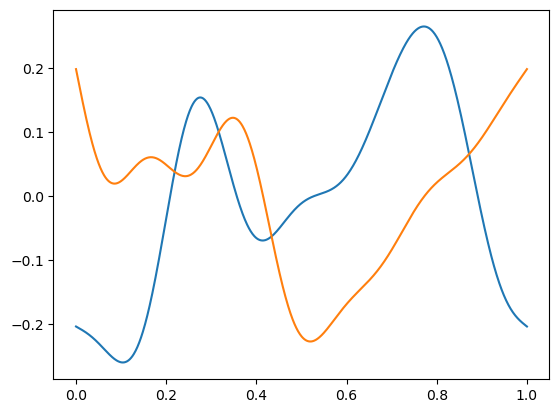

In [6]:
x = np.linspace(0,1,1000)
d = 10
plt.plot(x,KL_dt(x,d, distr='normal'))
plt.plot(x,KL_dt(x,d, distr='uniform'))

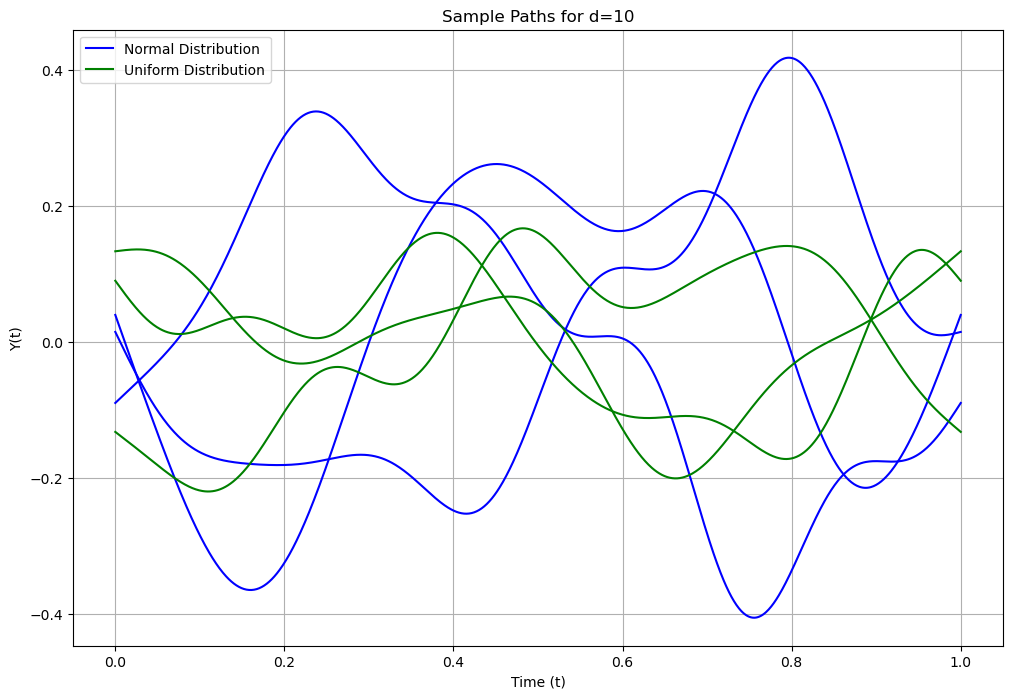

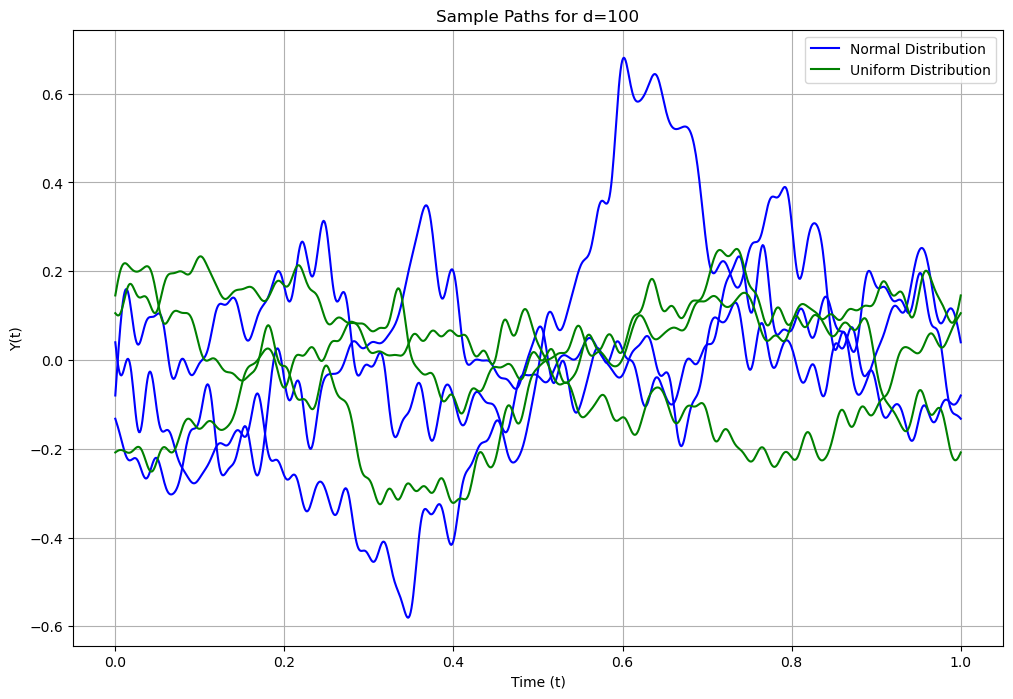

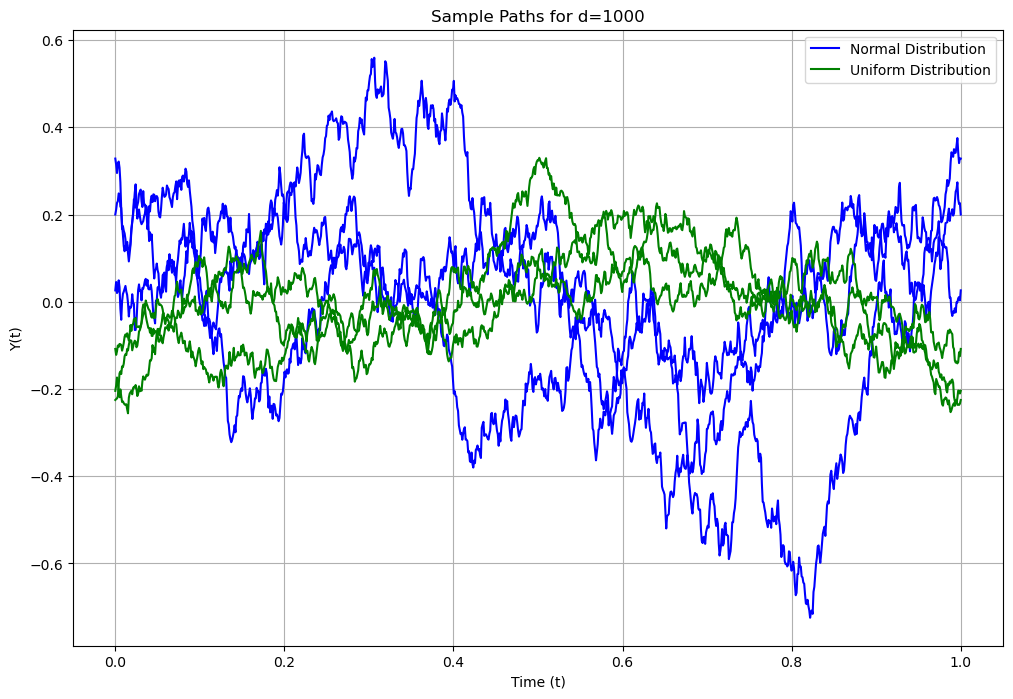

In [7]:
"""
ChatGPT plotting routine.
"""
def plot_sample_paths(num_paths, num_points, d, distributions):
    plt.figure(figsize=(12, 8))
    plt.title(f'Sample Paths for d={d}')
    plt.xlabel('Time (t)')
    plt.ylabel('Y(t)')
    
    # Define colors for normal and uniform distributions
    colors = ['b', 'g']

    for i, distribution in enumerate(distributions):
        for _ in range(num_paths):
            t_values = np.linspace(0, 1, num_points)
            Yt = KL_dt(t_values, d, distr=distribution)
            plt.plot(t_values, Yt, label=f'{distribution.capitalize()} Distribution', color=colors[i])

    # Use a single label for each distribution type
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid()
    plt.show()

# Parameters
num_paths = 3  # Number of sample paths to plot for each d
num_points = 1000  # Number of points for discretization
d_values = [10, 100, 1000]  # Different values of d
distributions = ['normal', 'uniform']  # Distribution types

# Plot sample paths for each d with both normal and uniform distributions
for d in d_values:
    plot_sample_paths(num_paths, num_points, d, distributions)
